## Implement Feed-forward Neural Network and train the network with different optimizers and compare the results.

In [5]:
pip install tensorflow 

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.



  Created wheel for jax: filename=jax-0.4.12-py3-none-any.whl size=1498562 sha256=bf726476772f5d7d7f7d3461d6768eee4e658bae30663b07cfa9d3969668f3f3
  Stored in directory: c:\users\lavup\appdata\local\pip\cache\wheels\ca\6c\0b\dab434867ee492673dd15dbf9f6cce85781b555432a92bfb10
Successfully built jax
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


In [6]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
# Load Iris dataset
iris = load_iris() # Loading Iris dataset into a variable.
X = iris.data # Features of the dataset.
y = iris.target # Class labels of the dataset.
# One-hot encode labels
lb = LabelBinarizer() # Creating an instance of LabelBinarizer class for one-hot encoding.
y = lb.fit_transform(y) # One-hot encoding the class labels.
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Splitting the dataset into training and testing sets with test size of 20%.
# Define model architecture
model = tf.keras.Sequential([
        # First hidden layer with 16 neurons and input shape of 4 features. ReLU activation function is used.
        tf.keras.layers.Dense(16, input_shape=(4,), activation='relu'), 
        # Second hidden layer with 8 neurons. ReLU activation function is used.
        tf.keras.layers.Dense(8, activation='relu'), 
        # Output layer with 3 neurons for 3 classes. Softmax activation function is used for multiclass␣classification task.
        tf.keras.layers.Dense(3, activation='softmax') 
        ])
# Compile model with different optimizers
optimizers = ['sgd', 'adam', 'rmsprop'] # List of optimizers to be used for training the model.
for optimizer in optimizers: # Looping over each optimizer.
    # Compiling the model with 'categorical_crossentropy' as the loss function,the current optimizer and accuracy as the metric to be calculated.
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, verbose=0) 
    # Training the model for 50 epochs with verbose=0 to suppress the output.
    
    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # Evaluating the model on the test set and calculating the loss and accuracy.
    print('Optimizer:', optimizer) # Printing the optimizer name.
    print('Test loss:', loss) # Printing the loss value on the test set.
    print('Test accuracy:', accuracy) # Printing the accuracy value on the test set.

Optimizer: sgd
Test loss: 0.5404835343360901
Test accuracy: 0.800000011920929
Optimizer: adam
Test loss: 0.35102665424346924
Test accuracy: 0.9666666388511658
Optimizer: rmsprop
Test loss: 0.2434636801481247
Test accuracy: 0.9666666388511658


'target_names': array(['setosa', 'versicolor', 'virginica']

'feature_names': ['sepal length (cm)',  'sepal width (cm)',  'petal length (cm)',  'petal width (cm)']

In [16]:
# Allow user to input values for the flower attributes
print('\nInput values for the flower attributes:')
sepal_length = float(input('Sepal length (cm): '))
sepal_width = float(input('Sepal width (cm): '))
petal_length = float(input('Petal length (cm): '))
petal_width = float(input('Petal width (cm): '))
# Predict class of flower based on input values
input_values = np.array([[sepal_length, sepal_width, petal_length,petal_width]])
prediction = model.predict(input_values)
predicted_class = np.argmax(prediction)
class_names = iris.target_names
print('\nPredicted class: ', class_names[predicted_class])


Input values for the flower attributes:
Sepal length (cm): 5
Sepal width (cm): 10
Petal length (cm): 11
Petal width (cm): 6
1/1 [==============================] - 0s 107ms/step

Predicted class:  virginica


In [17]:
#memory ---------------------------------------------
optimizers = {
                'sgd': tf.keras.optimizers.SGD(),
                'adam': tf.keras.optimizers.Adam(),
                'rmsprop': tf.keras.optimizers.RMSprop()
            }
# Compile model with different optimizers
for optimizer_name, optimizer in optimizers.items():
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Optimizer:', optimizer_name)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    # Estimate memory requirement
    size_in_bytes = model.count_params() * 4 # each parameter is a 32-bit float
    size_in_mb = size_in_bytes / (1024 * 1024)
    print(f'Memory requirement: {size_in_mb:.2f} MB')

Optimizer: sgd
Test loss: 0.15246990323066711
Test accuracy: 0.9666666388511658
Memory requirement: 0.00 MB
Optimizer: adam
Test loss: 0.11661176383495331
Test accuracy: 0.9666666388511658
Memory requirement: 0.00 MB
Optimizer: rmsprop
Test loss: 0.10857316851615906
Test accuracy: 0.9666666388511658
Memory requirement: 0.00 MB


## Program to implement regularization to prevent the model from overfitting

In [1]:
# Import TensorFlow library
import tensorflow as tf 

# Load the data # Load MNIST dataset
'''
loads the MNIST dataset using the load_data() function provided by Keras, a high-level API of TensorFlow.
The MNIST dataset contains 70,000 images of handwritten digits that are split into 
60,000 training images and 10,000 testing images.
'''
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data() 

# Preprocess the data
'''
Preprocess the data. The images are first reshaped from a 3D array (28x28 pixels) to a 2D array (784 pixels).
Then, the pixel values are normalized to be between 0 and 1 by dividing by 255. 
The labels are converted to one-hot encoding format using the to_categorical() function provided by Keras.
This is done to make it easier for the model to classify the images into 10 different classes (one for each digit).
'''
# Reshape and normalize training data
train_data = train_data.reshape((60000, 784)) / 255.0 
# Reshape and normalize testing data
test_data = test_data.reshape((10000, 784)) / 255.0 
# Convert training labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels) 
# Convert testing labels to one-hot encoding
test_labels = tf.keras.utils.to_categorical(test_labels) 

# Define the model architecture
'''
This code defines the architecture of the neural network model.
The Sequential() function is used to create a sequential model, meaning that the layers are added in sequence.
Three fully connected layers are defined using the Dense() function.
The first layer has 128 units, ReLU activation, and L2 regularization with a regularization parameter of 0.01.
The second layer has 64 units, ReLU activation, and L2 regularization with a regularization parameter of 0.01.
The third and final layer has 10 units, softmax activation, and is used for the classification task.
'''
model = tf.keras.models.Sequential([ # Define sequential model
         #Add a fully connected layer with 128 units, ReLU activation, and L2 regularization
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        # Add another fully connected layer with 64 units,ReLU activation, and L2 regularization
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), 
        # Add a final output layer with 10 units (one for each class), softmax activation
        tf.keras.layers.Dense(10, activation='softmax') 
        ])

# Compile the model
'''
This code compiles the model. The compile() function configures the model for training by specifying the optimizer,
loss function, and metrics to monitor during training. In this case, the Adam optimizer is used with a 
learning rate of 0.001, categorical cross-entropy is used as the loss function, and accuracy is monitored during training.
'''
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Use Adam optimizer with learning rate 0.001
                loss='categorical_crossentropy', # Use categorical cross-entropy loss function
                metrics=['accuracy']) # Monitor accuracy during training

# Train the model
'''
This code trains the model using the fit() function. The training data and labels are passed in as arguments,along with 
the number of epochs to train for, the batch size to use, and the validation data to use for monitoring model performance 
during training. The fit() function returns a history object that contains information about the training process, such as 
the loss and accuracy at each epoch. The purpose of this program is to demonstrate how to implement a neural network model 
for image classification using TensorFlow/Keras. The model uses regularization techniques to prevent overfitting and achieves 
high accuracy on the MNIST dataset.
'''
history = model.fit(train_data, train_labels, epochs=10, batch_size=128,
        # Train the model for 10 epochs,using batches of size 128, and validate on the testing data at the end of each epoch
                    validation_data=(test_data, test_labels)) 

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 1.1277 - accuracy: 0.8823 - val_loss: 0.6140 - val_accuracy: 0.9210
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5642 - accuracy: 0.9208 - val_loss: 0.5060 - val_accuracy: 0.9288
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4960 - accuracy: 0.9283 - val_loss: 0.4592 - val_accuracy: 0.9399
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4588 - accuracy: 0.9353 - val_loss: 0.4308 - val_accuracy: 0.9399
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4274 - accuracy: 0.9410 - val_loss: 0.3986 - val_accuracy: 0.9473
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4063 - accuracy: 0.9430 - val_loss: 0.3889 - val_accuracy: 0.9425
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3879 - accuracy: 0.9465 - val_loss: 0.3781 - val_accuracy: 0.9435
Epoch 

## Implement deep learning for recognizing classes for datasets like CIFAR-10 images for previously unseen images and assign them to one of the 10 classes.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding format
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model architecture
model = keras.Sequential([
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
        ])

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test,y_test))

# Save the trained model to a file
model.save("cifar10_model.h5")

170498071/170498071 [==============================] - 98s 1us/step
Epoch 1/10
782/782 [==============================] - 58s 71ms/step - loss: 1.6371 - accuracy: 0.4083 - val_loss: 1.3562 - val_accuracy: 0.5235
Epoch 2/10
782/782 [==============================] - 48s 61ms/step - loss: 1.3320 - accuracy: 0.5266 - val_loss: 1.1995 - val_accuracy: 0.5845
Epoch 3/10
782/782 [==============================] - 49s 63ms/step - loss: 1.2158 - accuracy: 0.5728 - val_loss: 1.1238 - val_accuracy: 0.6112
Epoch 4/10
782/782 [==============================] - 50s 64ms/step - loss: 1.1443 - accuracy: 0.6012 - val_loss: 1.0842 - val_accuracy: 0.6212
Epoch 5/10
782/782 [==============================] - 50s 64ms/step - loss: 1.0944 - accuracy: 0.6177 - val_loss: 1.0158 - val_accuracy: 0.6465
Epoch 6/10
782/782 [==============================] - 50s 65ms/step - loss: 1.0552 - accuracy: 0.6334 - val_loss: 1.0024 - val_accuracy: 0.6541
Epoch 7/10
782/782 [==============================] - 51s 65ms/step 

In [5]:
import numpy as np
from PIL import Image

# Load the saved model
model = keras.models.load_model("cifar10_model.h5")

# Load and preprocess the test image
img = Image.open("two.png")
img = img.resize((32, 32))
img_array = np.array(img)
img_array = img_array.astype("float32") / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions on the test image
predictions = model.predict(img_array)

# Get the predicted class label
class_label = np.argmax(predictions)

# Print the predicted class label
print("Predicted class label:", class_label)

1/1 [==============================] - 0s 349ms/step
Predicted class label: 2


## Implement deep learning for the Prediction of the autoencoder from the test data (e.g. MNIST (data set)

This program first loads the MNIST dataset and pre-processes it. It then defines the encoder and
decoder architectures and combines them into an autoencoder model. The autoencoder model is
compiled and trained on the training data.
The program then uses the trained autoencoder to predict the reconstructed images for the test
data. The reconstructed images are plotted alongside the original test images for comparison.
Note that in this program, we’re not using the labels of the MNIST dataset since we’re only
interested in reconstructing the input images. Also, the loss function used in the autoencoder is
binary crossentropy, since we’re treating each pixel value as a binary classification problem (i.e., is
the pixel on or off?). Finally, the images are plotted using the matplotlib library.

Epoch 1/10
469/469 [==============================] - 10s 15ms/step - loss: 0.2024 - val_loss: 0.1426
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1329 - val_loss: 0.1227
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1191 - val_loss: 0.1127
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1112 - val_loss: 0.1067
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1062 - val_loss: 0.1030
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1030 - val_loss: 0.1003
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1005 - val_loss: 0.0979
Epoch 8/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0984 - val_loss: 0.0964
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0966 - val_loss: 0.0947
Epoch 10/10
313/313 [==============================] - 1s 4ms/step


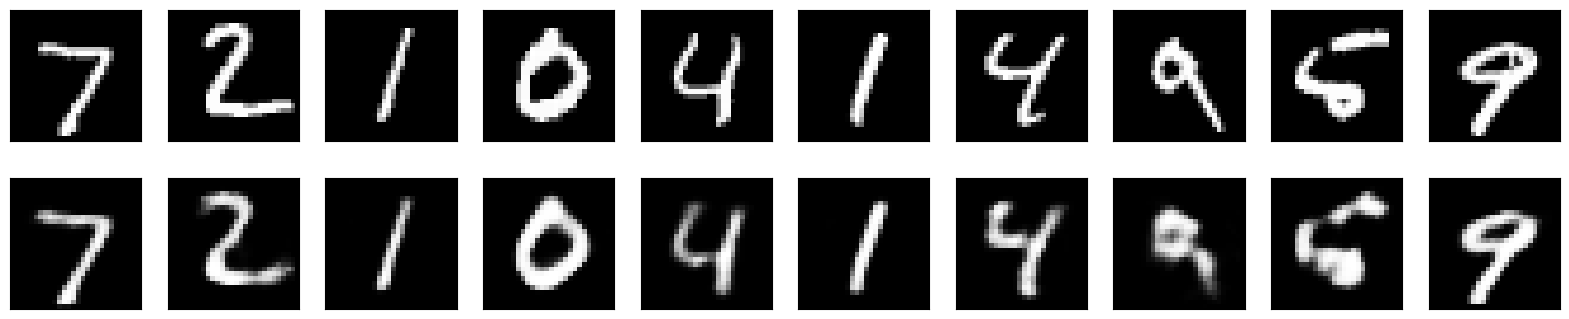

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the encoder architecture
encoder = keras.models.Sequential([
          keras.layers.Flatten(input_shape=[28, 28]),
          keras.layers.Dense(128, activation="relu"),
          keras.layers.Dense(64, activation="relu"),
          keras.layers.Dense(32, activation="relu"),
          ])

# Define the decoder architecture
decoder = keras.models.Sequential([
          keras.layers.Dense(64, activation="relu", input_shape=[32]),
          keras.layers.Dense(128, activation="relu"),
          keras.layers.Dense(28 * 28, activation="sigmoid"),
          keras.layers.Reshape([28, 28]),
          ])

# Combine the encoder and decoder into an autoencoder model
autoencoder = keras.models.Sequential([encoder, decoder])

# Compile the autoencoder model
autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001))

# Train the autoencoder model
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128,validation_data=(x_test, x_test))

# Use the trained autoencoder to predict the reconstructed images for the test data
decoded_imgs = autoencoder.predict(x_test)

#Plot some of the original test images and their reconstructed counterparts
n = 10 # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Implement Convolutional Neural Network for Digit Recognition on the MNIST Dataset

Epoch 1/10
469/469 [==============================] - 38s 76ms/step - loss: 0.2310 - accuracy: 0.9345 - val_loss: 0.0697 - val_accuracy: 0.9785
Epoch 2/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.0422 - val_accuracy: 0.9849
Epoch 3/10
469/469 [==============================] - 35s 76ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0424 - val_accuracy: 0.9857
Epoch 4/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0326 - val_accuracy: 0.9884
Epoch 5/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 6/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0303 - val_accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0331 - val_accuracy:

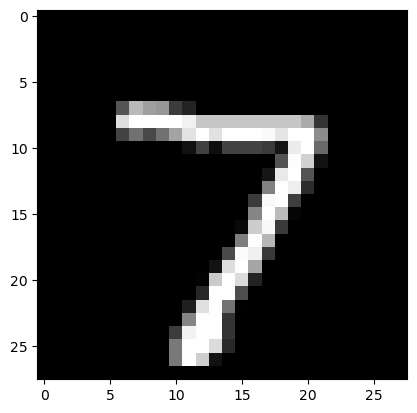

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define the CNN architecture
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
        ])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Show predictions for a sample input image
sample_img = x_test[0]
sample_label = y_test[0]
sample_img = np.expand_dims(sample_img, 0)
pred = model.predict(sample_img)
pred_label = np.argmax(pred)
print("Sample image true label:", sample_label)
print("Sample image predicted label:", pred_label)

# Display the sample image
plt.imshow(sample_img.squeeze(), cmap='gray')
plt.show()

## Implement Transfer Learning on the suitable public dataset (e.g. classify the cats versus dogs dataset from Kaggle or UCI or inbuilt dataset).

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 317s 3s/step - loss: 0.6768 - accuracy: 0.6025 - val_loss: 0.4649 - val_accuracy: 0.8220
Epoch 2/30
100/100 [==============================] - 363s 4s/step - loss: 0.5398 - accuracy: 0.7280 - val_loss: 0.3929 - val_accuracy: 0.8490
Epoch 3/30
100/100 [==============================] - 373s 4s/step - loss: 0.4698 - accuracy: 0.7805 - val_loss: 0.3636 - val_accuracy: 0.8550
Epoch 4/30
100/100 [==============================] - 324s 3s/step - loss: 0.4343 - accuracy: 0.7910 - val_loss: 0.3374 - val_accuracy: 0.8670
Epoch 5/30
100/100 [==============================] - 326s 3s/step - loss: 0.4080 - accuracy: 0.8105 - val_loss: 0.3238 - val_accuracy: 0.8740
Epoch 6/30
100/100 [==============================] - 8856s 89s/step - loss: 0.3915 - accuracy: 0.8145 - val_loss: 0.3187 - val_accuracy: 0.8680
Epoch 7/30
100/100 [==============================] - 34

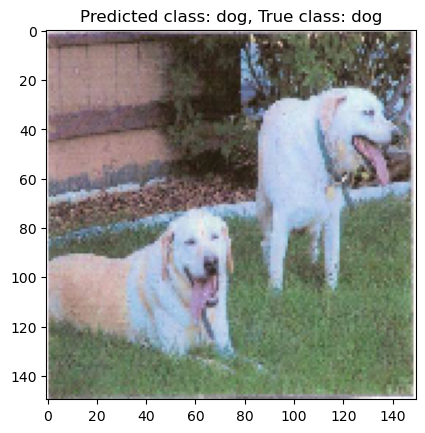

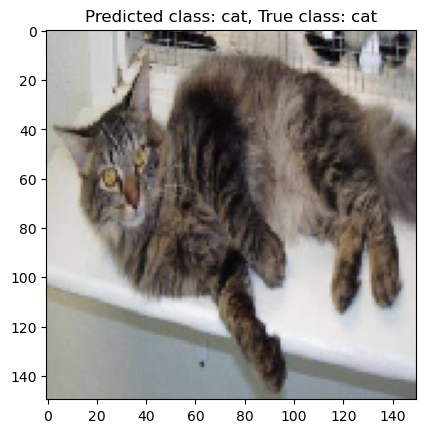

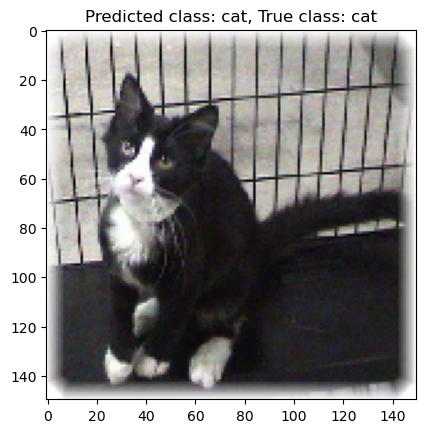

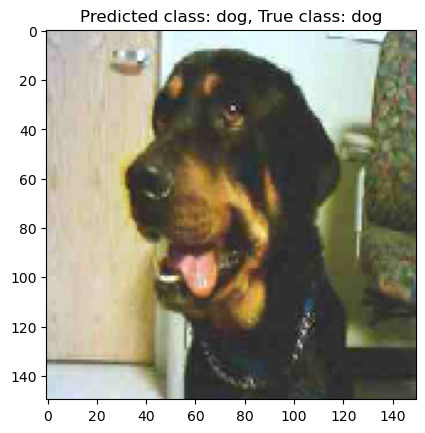

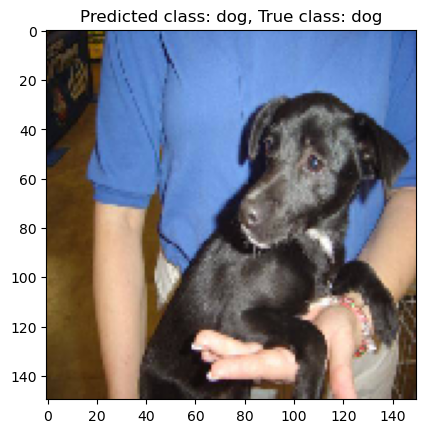

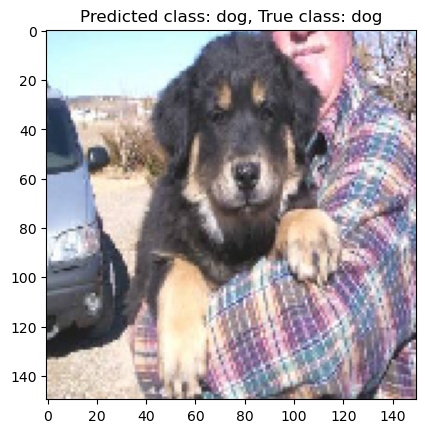

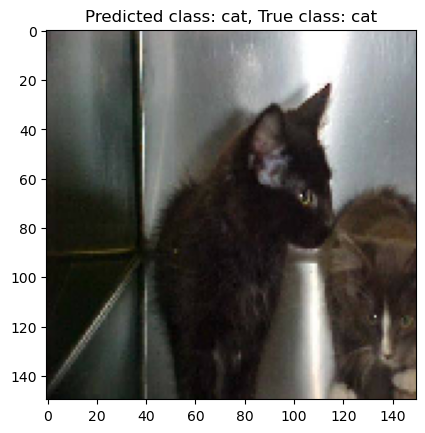

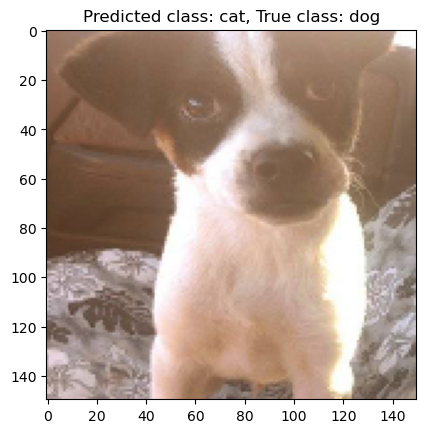

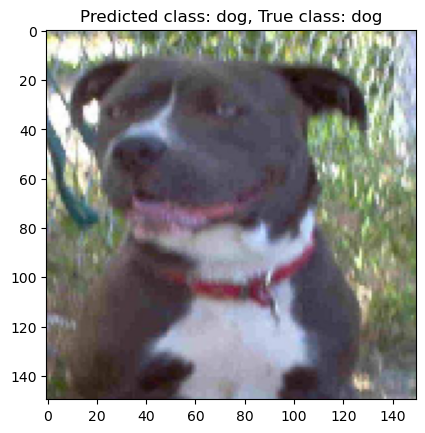

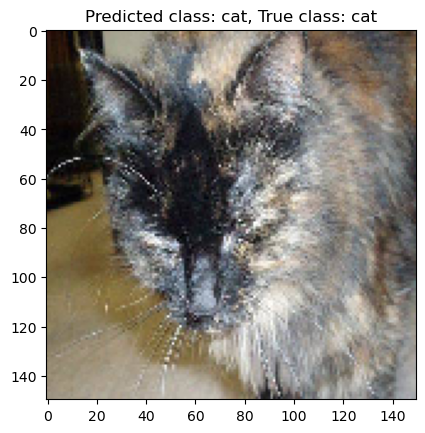

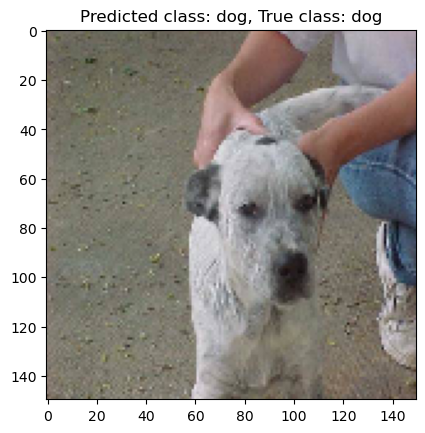

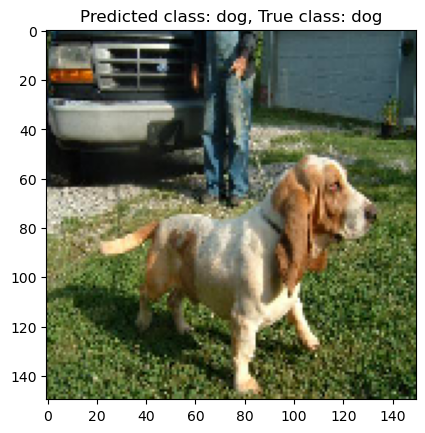

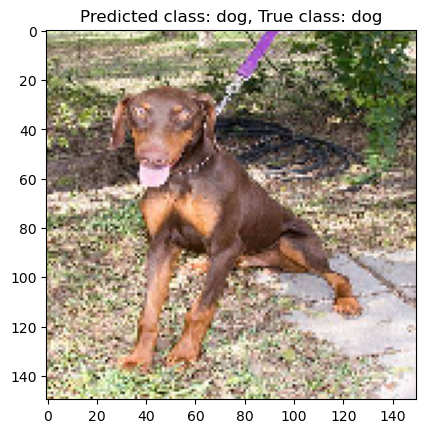

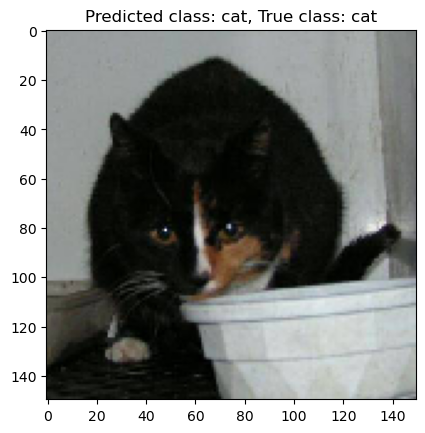

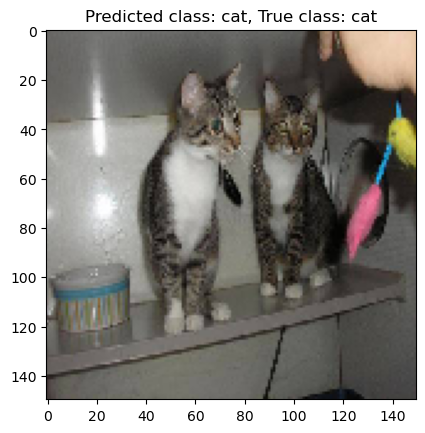

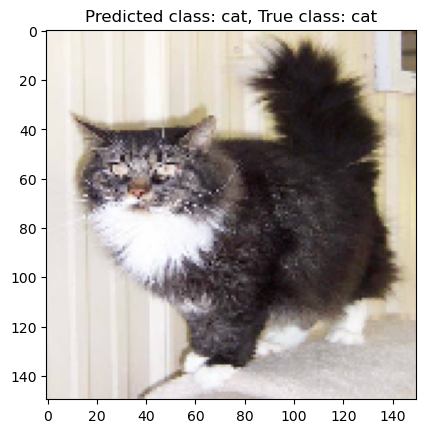

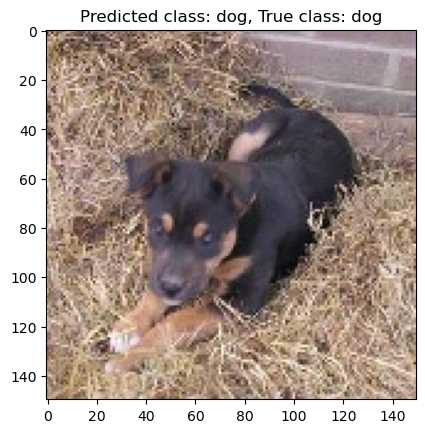

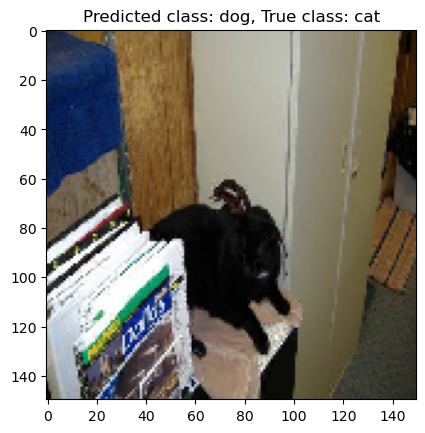

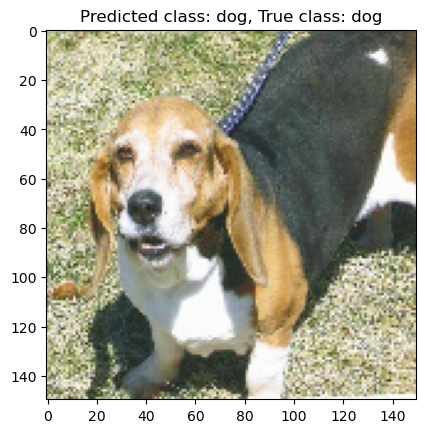

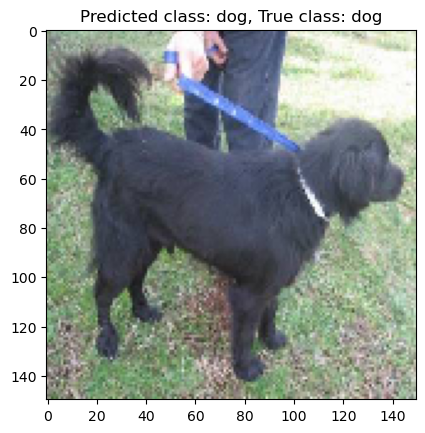

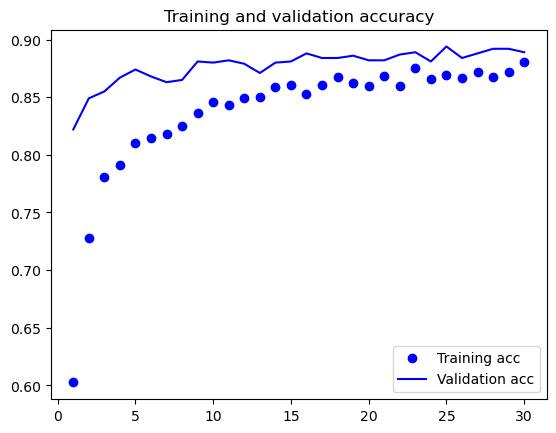

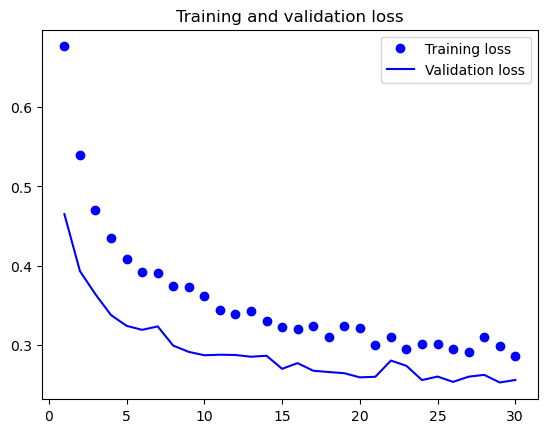

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# Download and extract dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = os.path.join(os.getcwd(), "cats_and_dogs_filtered.zip")
tf.keras.utils.get_file(filename, url)

with zipfile.ZipFile("cats_and_dogs_filtered.zip", "r") as zip_ref:
        zip_ref.extractall()
        
# Define data generators
train_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered", "train")
validation_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered","validation")

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150,150),batch_size=20,class_mode="binary")

# Load pre-trained VGG16 model
conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(150, 150, 3))

# Freeze convolutional base layers
conv_base.trainable = False

# Build model on top of the convolutional base
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=["accuracy"])

# Train model
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

# Show sample input and its predicted class
x, y_true = next(validation_generator)
y_pred = model.predict(x)
class_names = ['cat', 'dog']
for i in range(len(x)):
    plt.imshow(x[i])
    plt.title(f'Predicted class: {class_names[int(round(y_pred[i][0]))]}, True class: {class_names[int(y_true[i])]}')
    plt.show()
    
# Plot accuracy and loss over time
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

## Write a program for the Implementation of a Generative Adversarial Network for generating synthetic shapes (like digits)

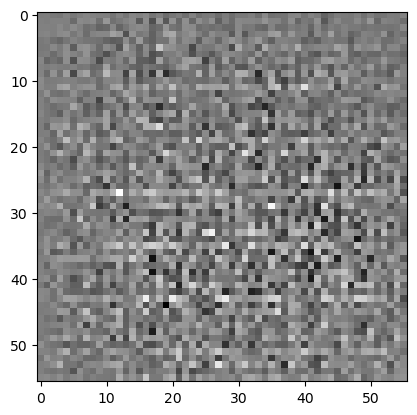

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

# Define the generator model
generator = tf.keras.Sequential([
            tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.Reshape((7, 7, 256)),
            tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1),padding='same', use_bias=False),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same',use_bias=False),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same',use_bias=False),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same',use_bias=False, activation='tanh')
            ])

# Define the discriminator model
discriminator = tf.keras.Sequential([
                tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same',input_shape=[28, 28, 1]),
                tf.keras.layers.LeakyReLU(),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'),
                tf.keras.layers.LeakyReLU(),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
                tf.keras.layers.LeakyReLU(),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1)
                ])

# Define the loss functions and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Define the training loop
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    # Apply gradients to the discriminator variables
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables))
    
    # Train the generator
    with tf.GradientTape() as gen_tape:
        # Generate fake images using the generator
        generated_images = generator(noise, training=True)
        # Get discriminator's prediction of the generated images
        gen_preds = discriminator(generated_images, training=False)
        # Calculate generator's loss
        gen_loss = generator_loss(gen_preds)
        
    # Get gradients of the generator loss with respect to the generator variables
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Apply gradients to the generator variables
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    # Print the losses
    print("Discriminator loss:", disc_loss.numpy(), "Generator loss:", gen_loss.numpy())
    
    # Save checkpoint
    ckpt_manager.save()
    
# Generate and save 10 random images from the generator after training
NOISE_DIM = 100

for i in range(10):
    noise = tf.random.normal([1, NOISE_DIM])
    generated_images = generator(noise, training=False)
    img = tf.squeeze(generated_images[0])
    plt.imshow(img, cmap='gray')
    plt.savefig(f'generated_image_{i}.png')

[]
Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed


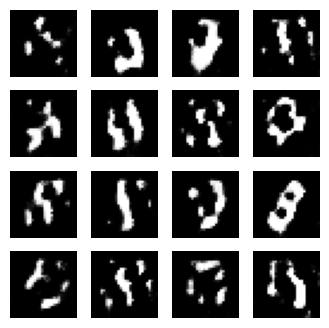

Epoch 10 completed
Epoch 11 completed
Epoch 12 completed
Epoch 13 completed
Epoch 14 completed
Epoch 15 completed
Epoch 16 completed
Epoch 17 completed
Epoch 18 completed
Epoch 19 completed


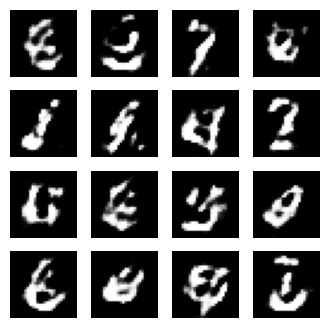

Epoch 20 completed
Epoch 21 completed
Epoch 22 completed
Epoch 23 completed
Epoch 24 completed
Epoch 25 completed
Epoch 26 completed
Epoch 27 completed
Epoch 28 completed
Epoch 29 completed


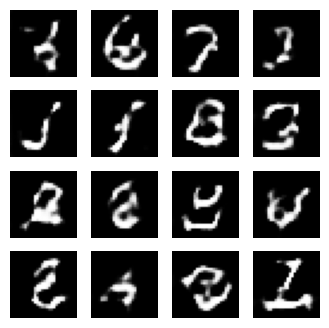

Epoch 30 completed
Epoch 31 completed
Epoch 32 completed
Epoch 33 completed
Epoch 34 completed
Epoch 35 completed
Epoch 36 completed
Epoch 37 completed
Epoch 38 completed
Epoch 39 completed


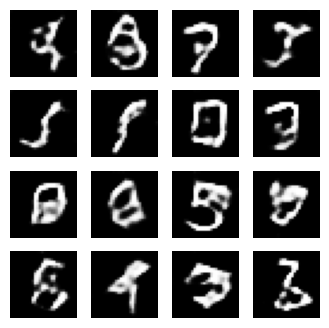

Epoch 40 completed
Epoch 41 completed
Epoch 42 completed
Epoch 43 completed
Epoch 44 completed
Epoch 45 completed
Epoch 46 completed
Epoch 47 completed
Epoch 48 completed
Epoch 49 completed


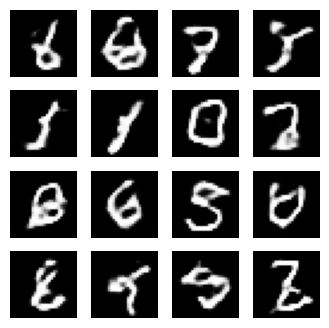

Epoch 50 completed
Epoch 51 completed
Epoch 52 completed
Epoch 53 completed
Epoch 54 completed
Epoch 55 completed
Epoch 56 completed
Epoch 57 completed
Epoch 58 completed
Epoch 59 completed


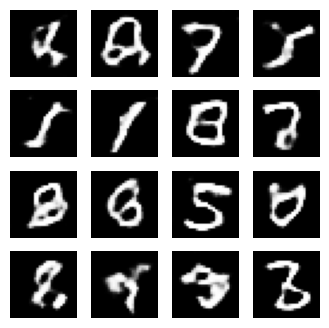

Epoch 60 completed
Epoch 61 completed
Epoch 62 completed
Epoch 63 completed
Epoch 64 completed
Epoch 65 completed
Epoch 66 completed
Epoch 67 completed
Epoch 68 completed
Epoch 69 completed


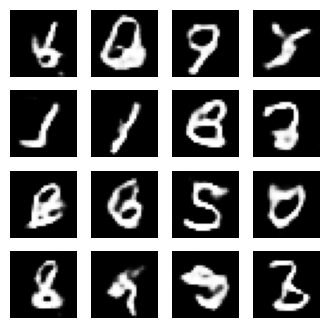

Epoch 70 completed
Epoch 71 completed
Epoch 72 completed
Epoch 73 completed
Epoch 74 completed
Epoch 75 completed
Epoch 76 completed
Epoch 77 completed
Epoch 78 completed
Epoch 79 completed


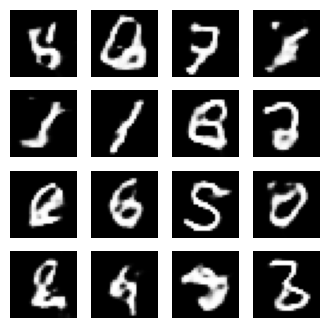

Epoch 80 completed
Epoch 81 completed
Epoch 82 completed
Epoch 83 completed
Epoch 84 completed
Epoch 85 completed
Epoch 86 completed
Epoch 87 completed
Epoch 88 completed
Epoch 89 completed


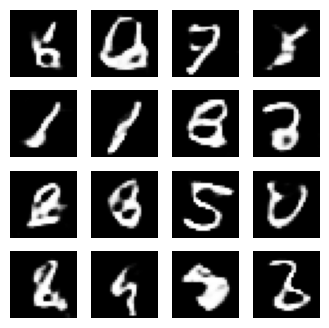

Epoch 90 completed
Epoch 91 completed
Epoch 92 completed
Epoch 93 completed
Epoch 94 completed
Epoch 95 completed
Epoch 96 completed
Epoch 97 completed
Epoch 98 completed
Epoch 99 completed


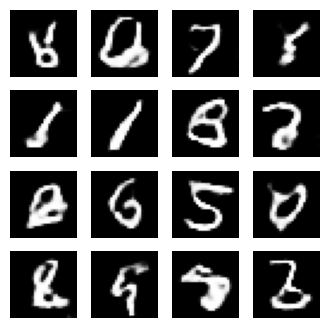

Epoch 100 completed


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Check if TensorFlow is able to detect a GPU
print(tf.config.list_physical_devices('GPU'))

# Set the GPU device to use
device_name = '/device:GPU:0'

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Normalize the images to [-1, 1]
train_images = (train_images.astype('float32') - 127.5) / 127.5

# Reshape the images to (28, 28, 1) and add a channel dimension
train_images = np.expand_dims(train_images, axis=-1)

# Batch and shuffle the data
BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False,input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)
    
    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1),padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2),padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2),padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)
    
    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2),padding='same', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2),padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))
    
    return model

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Define the models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Define the optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Define the training loop
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16

@tf.function
def train_step(images):
    #Generate noise
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #Generate fake images
        generated_images = generator(noise, training=True)
        # Evaluate discriminator on real and fake images
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        # Calculate the losses
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    # Apply gradients to the discriminator variables
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables))

def generate_and_save_images(model, epoch, test_input):
    # Generate images from the model
    predictions = model(test_input, training=False)
    # Rescale to [0, 1]
    predictions = (predictions + 1) / 2.0
    
    # Plot the images
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
        
    # Save the figure
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()
    
# Generate a fixed set of noise for evaluating the model during training
fixed_noise = tf.random.normal([num_examples_to_generate, noise_dim])

# Train the model
for epoch in range(EPOCHS):
    for image_batch in train_dataset:
        train_step(image_batch)
    # Generate and save images every 10 epochs
    if (epoch + 1) % 10 == 0:
        generate_and_save_images(generator, epoch + 1, fixed_noise)
    
    # Print progress every epoch
    print('Epoch {} completed'.format(epoch + 1))

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## A. (4-to-1 RNN) to show that the quantity of rain on a certain day also depends on the values of the previous day

Epoch 1/100
2/2 [==============================] - 2s 16ms/step - loss: 6.5093
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 6.3596
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 6.2094
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 6.0629
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 5.9184
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 5.7738
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 5.6335
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 5.4953
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 5.3596
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 5.2239
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 5.0943
Epoch 12/100
2/2 [==============================] - 0s 6ms/step - loss: 4.9621
Epoch 13/100
2/2 [==============================] - 0s 6ms/s

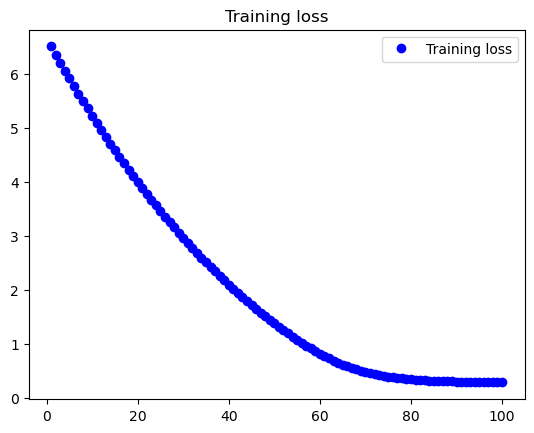

1/1 [==============================] - 0s 288ms/step
Previous days' rain data: [2.5 2.2 2.8 3.2]
Expected rain amount for next day: 2.4586902
1/1 [==============================] - 0s 36ms/step
Prediction: 2.4586902


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define sequence of 50 days of rain data
rain_data = np.array([2.3, 1.5, 3.1, 2.0, 2.5, 1.7, 2.9, 3.5, 3.0, 2.1,
                      2.5, 2.2, 2.8, 3.2, 1.8, 2.7, 1.9, 3.1, 3.3, 2.0,
                      2.5, 2.2, 2.4, 3.0, 2.1, 2.5, 3.2, 3.1, 1.9, 2.7,
                      2.2, 2.8, 3.1, 2.0, 2.5, 1.7, 2.9, 3.5, 3.0, 2.1,
                      2.5, 2.2, 2.8, 3.2, 1.8, 2.7, 1.9, 3.1, 3.3, 2.0])

# Create input and output sequences for training
def create_sequences(values, time_steps):
    x = []
    y = []
    for i in range(len(values)-time_steps):
        x.append(values[i:i+time_steps])
        y.append(values[i+time_steps])
    return np.array(x), np.array(y)

time_steps = 4
x_train, y_train = create_sequences(rain_data, time_steps)

# Define RNN model
model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(8, input_shape=(time_steps, 1)),
        tf.keras.layers.Dense(1)
        ])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Train model
history = model.fit(x_train.reshape(-1, time_steps, 1), y_train, epochs=100)

# Plot loss over time
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.title("Training loss")
plt.legend()
plt.show()

# Test model on new sequence
test_sequence = np.array([2.5, 2.2, 2.8, 3.2])
x_test = np.array([test_sequence])
y_test = model.predict(x_test.reshape(-1, time_steps, 1))

# Print input, output, and prediction
print("Previous days' rain data:", test_sequence)
print("Expected rain amount for next day:", y_test[0][0])
prediction = model.predict(np.array([test_sequence]).reshape(1, time_steps, 1))
print("Prediction:", prediction[0][0])

The output of this program will show the loss of the training data over time, as well as the expected
rain amount for the next day given the previous 4 days’ rain data, and the model’s prediction of
the next day’s rain amount. Note that the expected rain amount is simply the true value for the
next day in

## B. LSTM for sentiment analysis on datasets like UMICH SI650 for similar.

Epoch 1/10
156/156 [==============================] - 39s 207ms/step - loss: 0.6847 - accuracy: 0.5677 - val_loss: 0.6974 - val_accuracy: 0.5523
Epoch 2/10
156/156 [==============================] - 21s 134ms/step - loss: 0.6852 - accuracy: 0.5689 - val_loss: 0.6877 - val_accuracy: 0.5523
Epoch 3/10
156/156 [==============================] - 16s 104ms/step - loss: 0.6839 - accuracy: 0.5689 - val_loss: 0.6877 - val_accuracy: 0.5523
Epoch 4/10
156/156 [==============================] - 17s 111ms/step - loss: 0.6839 - accuracy: 0.5689 - val_loss: 0.6878 - val_accuracy: 0.5523
Epoch 5/10
156/156 [==============================] - 19s 122ms/step - loss: 0.6839 - accuracy: 0.5689 - val_loss: 0.6882 - val_accuracy: 0.5523
Epoch 6/10
156/156 [==============================] - 22s 142ms/step - loss: 0.6841 - accuracy: 0.5691 - val_loss: 0.6895 - val_accuracy: 0.5523
Epoch 7/10
156/156 [==============================] - 22s 138ms/step - loss: 0.6840 - accuracy: 0.5693 - val_loss: 0.6881 - val_ac

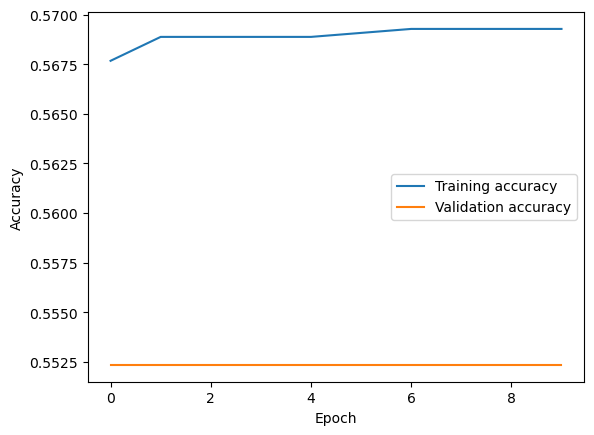

44/44 [==============================] - 1s 14ms/step
Text: these harry potter movies really suck <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
Actual label: 0
Predicted label: 1


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Load data
data = pd.read_csv("training.txt", delimiter="\t", names=["label", "text"])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["text"],data["label"], test_size=0.2, random_state=42)

# Tokenize words
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert words to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have same length
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding="post",truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding="post",truncating="post")

# Build LSTM model
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=32,input_length=max_length),
        tf.keras.layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

# Train model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32,validation_split=0.1)

# Evaluate model on test data
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Plot training and validation accuracy over time
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Make predictions on test data
predictions = model.predict(X_test_pad)

# Print input, output, and prediction for random example
index = np.random.randint(0, len(X_test_pad))
text = tokenizer.sequences_to_texts([X_test_pad[index]])[0]
label = y_test.values[index]
prediction = predictions[index][0]
print("Text:", text)
print("Actual label:", label)
print("Predicted label:", round(prediction))

The LSTM model predicted a label of 1 for the given text “i love the harry potter series if you can
count that as a book also catcher in the tye jane eyre the virgin suicides yeah”, which means that
the model classified this text as having a positive sentiment.

This code loads the UMICH SI650 dataset, splits it into training and testing sets, tokenizes the
words, converts them to sequences, and pads the sequences to have the same length. It then builds
an LSTM model with an embedding layer, an LSTM layer, and a dense output layer. The model
is compiled with binary cross-entropy loss and accuracy as a metric. The model is trained for
10 epochs, and the training and validation accuracy are plotted over time. Finally, the model
is evaluated on the test data, and a random example is chosen to print the input, output, and
prediction.

## program for object detection from the image

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the VGG16 model with pre-trained weights
model = VGG16()

# Load the image to detect objects in
img = load_img("C:\\Users\\lavup\\objectdetectimage.jpg", target_size=(224, 224))

# Convert the image to a numpy array
#The img_to_array() function adds channels: x.shape = (224, 224, 3) for RGB and (224, 224, 1) for gray image
img_arr = img_to_array(img)

#convert this array([1, 2]) to array([[1, 2]])
#expand_dims() is used to add the number of images: x.shape = (1, 224, 224, 3)
img_arr = np.expand_dims(img_arr, axis=0)
#preprocess_input subtracts the mean RGB channels of the imagenet dataset. 
#This is because the model you are using has been trained on a different dataset: x.shape is still (1, 224, 224, 3)
img_arr = preprocess_input(img_arr)

# Predict the objects in the image
preds = model.predict(img_arr)
#Integer, how many top-guesses to return. Defaults to 5.
decoded_preds = decode_predictions(preds, top=5)[0]

# Print the predicted objects and their probabilities
for pred in decoded_preds:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")

35363/35363 [==============================] - 0s 1us/step
necklace: 99.65%
chain: 0.25%
starfish: 0.02%
chain_mail: 0.02%
hook: 0.01%


In [4]:
import tensorflow as tf

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the VGG16 model with pre-trained weights
model = VGG16()

# Load the image to detect objects in
image = load_img('C:\\Users\\lavup\\objectdetectimage2.jpg', target_size=(224, 224))

# Convert the image to a numpy array
image = img_to_array(image)

# Reshape the image data for VGG
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# Preprocess the image
image = preprocess_input(image)

# Make predictions on the image using the VGG model
predictions = model.predict(image)

# Decode the predictions
decoded_predictions = decode_predictions(predictions, top=2)

# Print the predictions with their probabilities
for i, prediction in enumerate(decoded_predictions[0]):
    print("Object ", i+1, ": ", prediction[1], ", Probability: ", prediction[2])

1/1 [==============================] - 1s 506ms/step
Object  1 :  birdhouse , Probability:  0.10978619
Object  2 :  soccer_ball , Probability:  0.09997672
